<a href="https://colab.research.google.com/github/trilgar/MSM-2021/blob/main/MSM_lab1_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [14]:
num_epochs = 10
num_classes = 10 
batch_size = 100 
learning_rate = 0.001
DATA_PATH ='/content/datasets'
MODEL_STORE_PATH ='/content/saveloads/'

In [15]:
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))]) 

train_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True) 
test_dataset = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)

In [16]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size,shuffle=True) 
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [17]:
# class Perceptron(nn.Module):
#     def __init__(self):
#         super(Perceptron, self).__init__()
#         self.fc1 = nn.Linear(28*28, 200)
#         self.fc2 = nn.Linear(200, 200)
#         self.fc3 = nn.Linear(200, 10)
        

#     def forward(self, x):
#         out = F.relu(self.fc1(x))
#         out = F.relu(self.fc2(out))
#         out = F.log_softmax(self.fc3(out))
#         return out

In [18]:
class Perceptron(nn.Module):
    def __init__(self):
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(28*28, 200)
        self.fc2 = nn.Linear(200, 10)
        

    def forward(self, x):
        out = F.relu(self.fc1(x))
        out = F.log_softmax(self.fc2(out))
        return out

In [19]:
model = Perceptron()

In [20]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
total_step = len(train_loader)
loss_list = []
acc_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Run the forward pass
        images = images.view(-1, 28*28)
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track the accuracy
        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


Epoch [1/10], Step [100/600], Loss: 0.2456, Accuracy: 93.00%
Epoch [1/10], Step [200/600], Loss: 0.1921, Accuracy: 95.00%
Epoch [1/10], Step [300/600], Loss: 0.3425, Accuracy: 90.00%
Epoch [1/10], Step [400/600], Loss: 0.2069, Accuracy: 93.00%
Epoch [1/10], Step [500/600], Loss: 0.1832, Accuracy: 93.00%
Epoch [1/10], Step [600/600], Loss: 0.0965, Accuracy: 99.00%
Epoch [2/10], Step [100/600], Loss: 0.0506, Accuracy: 98.00%
Epoch [2/10], Step [200/600], Loss: 0.1362, Accuracy: 95.00%
Epoch [2/10], Step [300/600], Loss: 0.1055, Accuracy: 98.00%
Epoch [2/10], Step [400/600], Loss: 0.1738, Accuracy: 93.00%
Epoch [2/10], Step [500/600], Loss: 0.0320, Accuracy: 100.00%
Epoch [2/10], Step [600/600], Loss: 0.0932, Accuracy: 95.00%
Epoch [3/10], Step [100/600], Loss: 0.0709, Accuracy: 97.00%
Epoch [3/10], Step [200/600], Loss: 0.0699, Accuracy: 98.00%
Epoch [3/10], Step [300/600], Loss: 0.0311, Accuracy: 100.00%
Epoch [3/10], Step [400/600], Loss: 0.0713, Accuracy: 98.00%
Epoch [3/10], Step [50

In [22]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format((correct / total) * 100))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


Test Accuracy of the model on the 10000 test images: 97.61999999999999 %


In [23]:
torch.save(model.state_dict(),'perceptron_model.ckpt')

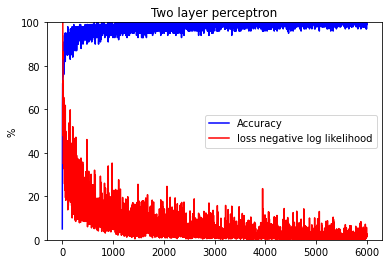

In [24]:
plt.title('Two layer perceptron')
plt.ylabel("%")
plt.ylim((0, 100)) 
plt.plot(np.arange(len(loss_list)), np.array(acc_list)*100, color = "blue", label= 'Accuracy')
plt.plot(np.arange(len(loss_list)), np.array(loss_list)*100, color= 'red', label = 'loss negative log likelihood')
plt.legend()
plt.show()